# Load and Process Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
import warnings
warnings.filterwarnings('ignore')
data = pd.read_csv('RA_21_22.csv')
data['wealth_total'] = data['asset_total'] - data['debt_total']
data['wealth_housing'] = data['asset_housing'] - data['debt_housing']
data['wealth_nonhousing'] = data['wealth_total'] - data['wealth_housing'] 

In [2]:
data

,weight,year,age,sex,education,race,asset_total,asset_housing,debt_total,debt_housing,income,wealth_total,wealth_housing,wealth_nonhousing
0,6859.959728,1989,35,female,no college,white,3731.72,0.00,1530.01,0.00,9737.17,2201.71,0.00,2201.71
1,7375.788638,1989,35,female,no college,black,0.00,0.00,0.00,0.00,11684.60,0.00,0.00,0.00
2,4193.294199,1989,40,male,no college,other,216439.77,139939.51,26681.80,18658.60,83739.63,189757.97,121280.91,68477.06
3,4743.208024,1989,51,female,no college,black,40060.02,18658.60,26383.26,5597.58,19474.33,13676.76,13061.02,615.74
4,5971.319496,1989,28,male,no college,black,35675.24,33585.48,27987.90,20524.46,35053.80,7687.34,13061.02,-5373.68
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47771,3033.103970,2016,43,male,some college,white,253300.00,0.00,96500.00,0.00,113415.28,156800.00,0.00,156800.00
47772,5721.988043,2016,67,male,some college,white,279400.00,120000.00,15000.00,0.00,109364.73,264400.00,120000.00,144400.00
47773,4824.390087,2016,60,male,college degree,white,1500.00,0.00,35000.00,0.00,40505.46,-33500.00,0.00,-33500.00
47774,4132.549093,2016,48,female,no college,white,4430.00,0.00,100.00,0.00,23290.64,4330.00,0.00,4330.00


# Q1

## 1.1 By Race

In [3]:
data1 = data.copy()
data1['median_wealth'] = data1.groupby(['year','race'])['wealth_total'].\
                            transform('median')
data1 = data1[['year','race','median_wealth']].drop_duplicates()
data1['median_wealth'] = data1['median_wealth'].round(decimals=2)
table1 = pd.pivot_table(data1, values='median_wealth',index=['year'],columns=['race'])

In [4]:
table1

race,Hispanic,black,other,white
year,,,,
1989,20524.46,13965.97,169588.02,313604.43
1992,14691.12,24015.62,147238.23,293319.29
1995,23646.66,22002.36,262407.53,281990.41
1998,15713.62,16030.84,113610.23,333527.18
2001,20187.28,17545.31,278028.98,409165.01
2004,26707.43,17175.41,368110.94,461275.33
2007,31266.40,13722.48,317550.88,528112.75
2010,14700.88,12380.24,103900.91,269672.59
2013,13816.81,9290.25,187351.72,281336.90


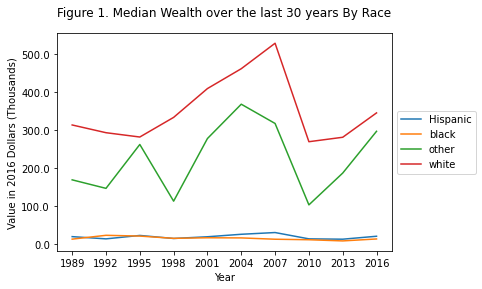

In [5]:
def thousands(x, pos):
    'The two args are the value and tick position'
    return '%1.1f' % (x * 1e-3)
formatter = FuncFormatter(thousands)
ax = plt.gca()
for i in list(table1.columns):
    table1.plot(kind='line',use_index=True,y=i,ax=ax)
plt.title('Figure 1. Median Wealth over the last 30 years By Race')
plt.xlabel('Year')
plt.ylabel('Value in 2016 Dollars (Thousands)')
start, end = ax.get_ylim()
ax.set_xticks(np.arange(1989, 2017, 3))
ax.yaxis.set_major_formatter(formatter)
ax.title.set_position([.5, 1.05])
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

### Description
Figure 1 shows the median wealth trend in 2016 Dollars over the last 30 years by race. The median wealth of Hispanic and black was lower and more stable than that of white and other. For Hispanic, the median wealth fluctuated between 13,817 and 31,266, while the median wealth was within the 9,290 and 24,016 range for black. The median wealth of white declined from 313,604 in 1989 to 281,990 in 1995. It dramatically rose to 528,113 in 2007, followed by a plunge to 269,673 in 2010, then it recovered to 345,300 in 2016. For other races, the median wealth dropped to 147,238 in 1992 and then increased to 262,408 in 1995 and declined to 113,610 in 1998. Between 1998 and 2010, it climbed to 461,275 in 2004 and plummeted to 103,901 in 2010. Since then, it increased again to 297,000 in 2016.

## 1.2 By Education

In [6]:
data2 = data.copy()
data2['median_wealth'] = data2.groupby(['year','education'])['wealth_total'].\
                            transform('median')
data2 = data2[['year','education','median_wealth']].drop_duplicates()
data2['median_wealth'] = data2['median_wealth'].round(decimals=2)
table2 = pd.pivot_table(data2, values='median_wealth',index=['year'],\
                        columns=['education'])

In [7]:
table2

education,college degree,no college,some college
year,,,
1989,1209310.56,85829.56,207110.47
1992,1032403.41,60676.34,163547.73
1995,960587.11,86310.33,142843.09
1998,1254802.90,67133.32,154923.04
2001,1826271.44,63339.28,161633.72
2004,1645177.19,63461.92,120609.44
2007,2085712.43,80777.33,189422.30
2010,805563.60,37255.10,71492.67
2013,876490.51,36199.50,62588.05


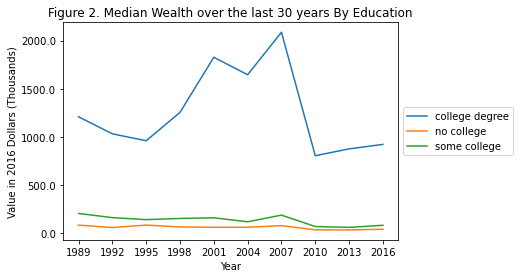

In [8]:
ax = plt.gca()
for i in list(table2.columns):
    table2.plot(kind='line',use_index=True,y=i,ax=ax)
plt.title('Figure 2. Median Wealth over the last 30 years By Education')
plt.xlabel('Year')
plt.ylabel('Value in 2016 Dollars (Thousands)')
ax.set_xticks(np.arange(1989, 2017, 3)) 
ax.yaxis.set_major_formatter(formatter)
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

### Description
Figure 2 displays the median wealth trend in 2016 Dollars over the last 30 years by education. The median wealth of no college and some college slowly decreased from 1989 to 2016. No college group's median wealth declined from 85,830 to 43140, while some college groups' median wealth dropped from 207,110 to 84,205. For the college degree group, the median wealth decreased from 1,209,311 in 1989 to 960,587 in 1995; then, it started to fastly climb to 2,085,712 in 2007 with a slight decrease in 2004. After that, it shrank dramatically by more than half to 805,564 and increased gradually to 922,900 in 2016.

### 1.3 By Education and Race

In [9]:
data3 = data.copy()
data3['median_wealth'] = data3.groupby(['year','race','education'])['wealth_total'].\
                            transform('median')
data3 = data3[['year','race','education','median_wealth']].drop_duplicates()
data3['median_wealth'] = data3['median_wealth'].round(decimals=2)
data3.reset_index(drop=True, inplace=True)
table3 = pd.pivot_table(data3, values='median_wealth', columns=['education','race']\
                        ,index=['year'])

In [10]:
table3

education college degree                                   no college  \
race            Hispanic      black      other       white   Hispanic   
year                                                                    
1989            82099.71  116755.92  512775.66  1439511.05   12370.65   
1992           169006.58  149250.72  746245.20  1160070.25    8603.36   
1995           186072.64  110403.31  985408.28  1111941.44   10805.43   
1998           194332.52  173440.04  681440.08  1458637.36   11479.06   
2001           171388.65  132165.72  694361.16  2187000.53   10906.55   
2004           399059.75   92821.00  685744.85  2168642.67   14739.96   
2007           327370.85  147056.33  547335.80  2686270.59   18678.78   
2010            98484.80   81783.28  384654.41  1148666.10   11501.50   
2013            99450.04   45162.39  616291.26  1148856.80   10775.04   
2016           129017.50   78150.00  759050.00  1284200.00   15300.00   

education                               some college                       \
race         black     other      white     Hispanic     black      other   
year                                                                        
1989       7370.14  63681.80  134808.39     62730.22  40041.36   53428.90   
1992       5987.14  57909.18  104036.94     58881.88  42765.25  135582.61   
1995       7313.24  37497.98  122148.34     29566.17  26465.47  130056.66   
1998       7104.32  18339.94  118066.12     42493.18  31043.63  161267.51   
2001       7749.75  10567.83  110420.36     23438.92  23608.28   11638.17   
2004       8075.82  35927.84  116972.14     40442.67  18599.81   72955.78   
2007       6484.88  85745.22  141277.83     49470.40  17022.82  263680.02   
2010       7350.44  40068.16   75051.82     13413.16   8289.97   30893.94   
2013       5990.72  21921.29   79601.28     13956.00  10527.58   30881.58   
2016       8190.00  43001.00  100625.00     21800.00  11107.50   55975.00   

education             
race           white  
year                  
1989       247786.22  
1992       189575.83  
1995       184303.06  
1998       195940.76  
2001       218503.60  
2004       186953.22  
2007       256998.28  
2010       126952.54  
2013       125691.66  
2016       136200.00

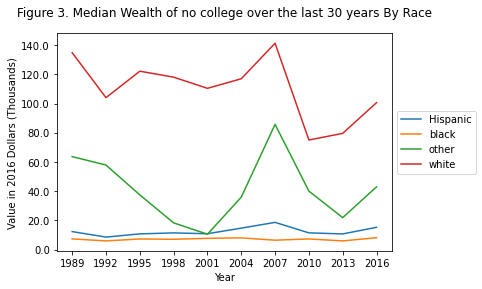

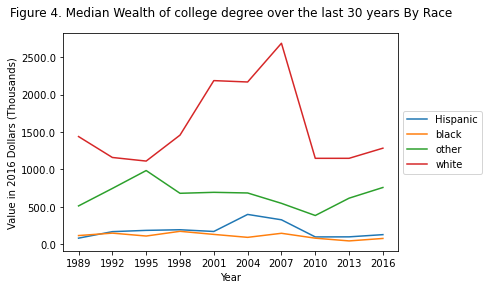

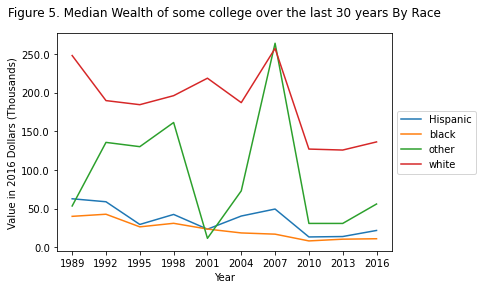

In [11]:
race = list(set(table3.columns.get_level_values(0)))
k =3
for j in race:
    ax = plt.gca()
    for i in [col for col in table3 if col[0]==j]:
        table3.plot(kind='line',use_index=True,y=i,ax=ax,label=i[1])
    plt.title('Figure '+ str(k) +'. Median Wealth of '+ j\
              + ' over the last 30 years By Race')
    plt.xlabel('Year')
    plt.ylabel('Value in 2016 Dollars (Thousands)')
    ax.title.set_position([.5, 1.05])
    ax.yaxis.set_major_formatter(formatter)
    ax.set_xticks(np.arange(1989, 2017, 3)) 
    ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    plt.show()
    k+=1

### Description
Figure 3 - 5 manifest the median wealth trend over the last 30 years by education level and race. For each education level and each year, the median wealth of white was the highest, and that of black was the lowest. The amplitudes of changes of black and Hispanic were much milder than that of white and other races.

## Q2

In [12]:
data4 = data[(data['race']=='black') | (data['race']=='white')]
data4['median_wealth_housing'] = data4.groupby(['year','race'])['wealth_housing'].\
                                    transform('median')
data4 = data4[['year','race','median_wealth_housing']].drop_duplicates()
data4['median_wealth_housing'] = data4['median_wealth_housing'].round(decimals=2)
table4 = pd.pivot_table(data4, values='median_wealth_housing', columns=['race'],\
                        index=['year'])

In [13]:
table4

race,black,white
year,,
1989,0.0,111951.60
1992,0.0,95592.90
1995,0.0,86130.25
1998,0.0,95904.75
2001,0.0,118549.46
2004,0.0,146254.93
2007,0.0,173702.25
2010,0.0,77373.01
2013,0.0,82488.37


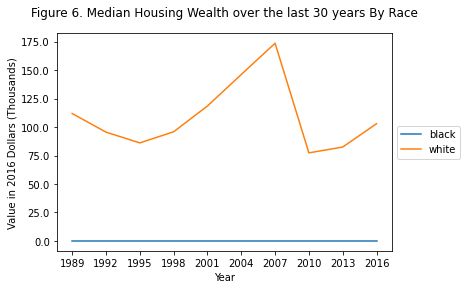

In [14]:
ax = plt.gca()
for i in list(table4.columns):
    table4.plot(kind='line',use_index=True,y=i,ax=ax)
plt.title('Figure 6. Median Housing Wealth over the last 30 years By Race')
plt.xlabel('Year')
plt.ylabel('Value in 2016 Dollars (Thousands)')
ax.set_xticks(np.arange(1989, 2017, 3))
ax.yaxis.set_major_formatter(formatter)
ax.title.set_position([.5, 1.05])
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

### Description
Figure 6 reveals the median housing wealth trend over the last 30 years for black and white. The median housing wealth of black remained 0 from 1989 to 2016, then more than half of black people had negative or zero housing wealth, which means that either that they did not own houses or that their housing assets were less than their housing debts. The median housing wealth of white decreased slightly from 111,952 in 1989 to 86,130 in 1995, and then it climbed sharply to 173,702. In 2010, it plummeted drastically to 77,373, and recovered to 103,000 afterward.

# Q3

In [15]:
data5  = data[((data['race']=='black') | (data['race']=='white'))&\
              (data['age']>=25) & (data['asset_housing']>0)]
data5['median_wealth_housing'] = data5.groupby(['year','race'])['wealth_housing'].\
                                    transform('median')
data5['median_wealth_nonhousing'] = data5.groupby(['year','race'])['wealth_nonhousing'].\
                                        transform('median')
data5 = data5[['year','race','median_wealth_housing','median_wealth_nonhousing']].\
            drop_duplicates()
data5[['median_wealth_housing','median_wealth_nonhousing']] = \
    data5[['median_wealth_housing','median_wealth_nonhousing']].round(decimals=2)
table5 = pd.pivot_table(data5, values=['median_wealth_housing',\
                                       'median_wealth_nonhousing'], \
                                        columns=['race'],index=['year'])

In [16]:
table5

median_wealth_housing            median_wealth_nonhousing           
race                 black      white                    black      white
year                                                                     
1989              59707.52  158598.11                 12650.53  279692.42
1992              58697.40  159321.52                 23076.46  385138.79
1995              46980.13  144072.40                 28587.41  344599.28
1998              52378.74  162300.33                 37520.89  429210.61
2001              52839.19  203227.65                 33871.28  564634.16
2004              58501.97  254356.40                 27966.49  583588.97
2007              78745.02  288345.74                 59521.97  619103.78
2010              55266.44  162483.33                 28296.42  327066.79
2013              51555.24  164976.74                 26084.37  380786.95
2016              65000.00  200000.00                 40000.00  488950.00

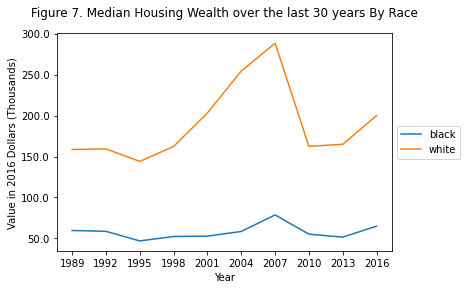

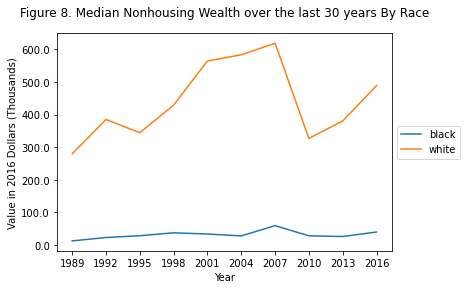

In [17]:
asset = list(set(table5.columns.get_level_values(0)))
titles = ['Housing','Nonhousing']
k =7
for j in range(len(asset)):
    ax = plt.gca()
    for i in [col for col in table5 if col[0]==asset[j]]:
        table5.plot(kind='line',use_index=True,y=i,ax=ax,label=i[1])
    plt.title('Figure '+ str(k) +'. Median ' + \
              asset[j].split('_')[-1].capitalize() + \
              ' Wealth over the last 30 years By Race')
    plt.xlabel('Year')
    plt.ylabel('Value in 2016 Dollars (Thousands)')
    ax.title.set_position([.5, 1.05])
    ax.yaxis.set_major_formatter(formatter)
    ax.set_xticks(np.arange(1989, 2017, 3)) 
    ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    plt.show()
    k += 1

### Description
Figure 7 exhibits the median housing wealth trend over the last 30 years for black and white house owners older than 25. The median housing wealth of black decreased slowly from 59,708 in 1989 to 46,980 in 1995, and then it moderately rose to 78,745 in 2007. Subsequently, it dropped to 51,555 in 2013 and revived in 2016. The median housing wealth of white decreased slightly from 158,598 in 1989 to 144,072 in 1995, and then it nearly doubled to 288,345 in 2007. In 2010, it plunged severely to 77,373 in 2010, followed by a small rebound.

Figure 8 depicts the median nonhousing wealth trend in 2016 Dollars over the last 30 years for black and white house owners older than 25. The median nonhousing wealth of black gradually increased from 12,651 in 1989 to 59,522 in 2007, where there were two consecutive declines in 2001 and 2004. Since then, it fell off to below half of wealth in 2007, and continued to diminish in 2010 and recovered slightly in 2016. The median wealth of white considerably increased from 279,692 in 1989 to 619,103 in 2007, only with a mild drop in 1995. In 2010, the wealth fell off to 327,067 and bounced back afterward.

In [18]:
data6  = data[(data['age']>=25) & (data['asset_housing']>0)]
data6['median_wealth_housing'] = data6.groupby(['year','race'])['wealth_housing'].\
                                    transform('median')
data6 = data6[['year','race','median_wealth_housing']].drop_duplicates()
data6[['median_wealth_housing']] = data6[['median_wealth_housing']].round(decimals=2)
table6 = pd.pivot_table(data6, values=['median_wealth_housing'], \
                        columns=['race'],index=['year'])

In [19]:
table6

median_wealth_housing                                
race              Hispanic     black      other      white
year                                                      
1989              63439.24  59707.52  139939.51  158598.11
1992              60374.47  58697.40  159321.51  159321.52
1995              74385.21  46980.13  203580.57  144072.40
1998              81150.17  52378.74  177054.91  162300.33
2001              67742.55  52839.19  338712.76  203227.65
2004             103650.23  58501.97  330663.32  254356.40
2007             111169.44  78745.02  237393.08  288345.74
2010              49739.80  55266.44  221065.75  162483.33
2013              58772.96  51555.24  207252.04  164976.74
2016              80500.00  65000.00  310000.00  200000.00

### Calculation
$$
\begin{aligned}
loss_{black,housing} = 78,745.02 - 55,266.44 = 23,478.58\\
loss_{black,housing}\% = \frac{23,478.58}{78,745.02} = 29.82\%\\
loss_{white,housing} = 288,345.74 - 162,483.33 = 125,862.41\\
loss_{white,housing}\% = \frac{125,862.41}{288,345.74} = 43.65\%\\
loss_{Hispanic,housing} = 111,169.44 - 49,739.80 = 61,429.64\\
loss_{Hispanic,housing}\% = \frac{61,429.64}{111,169.44} = 55.26\%\\
loss_{other,housing} = 237,393.08 - 221,065.75 = 16,327.33\\
loss_{other,housing}\% = \frac{16,327.33}{237,393.08} = 6.88\%\\
\end{aligned}
$$

If we do not consider Hispanic and other, white people had the largest loss in housing wealth from 2007 to 2010 both in dollar terms and proportionally, that were 125,862.41 dollars and 43.65%.

If we consider Hispanic and other, then we filter homeowners age 25 or older of all races. For the housing wealth from 2007 to 2010, white people had the largest loss in dollar terms that were 125,862.41 dollars, while Hispanic people had largest loss proportionally, 55.26%.

# Q4

From Figure 3 - 5, we know that the wealth of different races by education shares a ubiquitous pattern for all education levels that the rank of wealth is white, other, Hispanic, and black. Although there is a possibility that under each level of education, white people attend better schools than other races such that we can have facts displayed in Figure 3 - 5, the thing that the difference of education quality across races can explain all the variation created by race and education is a strong assumption to satisfy.  It is more likely to be the case that race captures some effects on the wealth or correlates with some unobservables, which can derive from the different characteristics or preferences, limited access to resources, or discrimination.

Discrimination exists in various ways, such as different access to the financial market and labor market. Access to the financial market indicates the ability to get loans, while the primary source of housing debt is the mortgage and the main source of nonhousing debt is the credit card. To explore the discrimination in the financial market, we can regress the housing debt on the race controlling for year, age, gender, education, income, and housing wealth, which is to examine whether in the same year people with a similar social and financial background of different races have different ability to get housing loans. We do not test the nonhousing debt because the credit card balance cannot represent the credit card limit. Likely, rich people do not use up their credit limits. If a person has more restricted access to high-paying jobs because of race, then her lifetime income and wealth will be hurt. As to the hypothesis that the labor market contributes to wealth disparity, we can identify the discrimination in the labor market by regressing income on race controlling for year, age, gender, and education. Apart from this observational data, the field experiment can also shed light on this question, as per Bertrand & Mullainathan 2004.

The neighborhood characteristics by race can also bring wealth gaps because black people are less exposed to valuable amenities. This data does not capture the neighborhood characteristics. However, it could be tested by the data that includes data of black people moving to white neighborhoods and white people moving to black neighborhoods without changing their jobs due to some exogenous reasons (e.g., construction of previous neighborhoods, Etc.). If the people who moved across neighborhoods had distinct wealth than before, then neighborhood characteristics of different races affect wealth. 